In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# 1. Load the dataset
from google.colab import files      #google: top-level package in Colab, files: module for file upload/download.
uploaded = files.upload()           #upload: method that opens a file picker, (): calls the method, returns a dict of {filename: content}.
csv_filename = next(iter(uploaded)) #next: built-in function giving the next item from an iterator, iter: built-in that returns an iterator over a collection, uploaded: the dict we got from files.upload().
df = pd.read_csv(csv_filename)

# 2. Quick data overview
print("Data shape:", df.shape)
print("\nStatistical summary (df.describe()):\n", df.describe())

# 3. Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# 4. head
print("head", df.head())

# 5. Tail
print("Tail", df.tail())



#7. Info
print("info",df.info())





Saving A4 Cardiac Disease.csv to A4 Cardiac Disease (2).csv
Data shape: (1080, 14)

Statistical summary (df.describe()):
                Age          Sex  Chestpaintype  Restingbloodpressure  \
count  1080.000000  1080.000000    1080.000000           1080.000000   
mean     54.433333     0.677778       3.174074            131.344444   
std       9.096395     0.467544       0.948768             17.836760   
min      29.000000     0.000000       1.000000             94.000000   
25%      48.000000     0.000000       3.000000            120.000000   
50%      55.000000     1.000000       3.000000            130.000000   
75%      61.000000     1.000000       4.000000            140.000000   
max      77.000000     1.000000       4.000000            200.000000   

       Serumcholesterol  Fastingbloodsugar  \
count       1080.000000        1080.000000   
mean         249.659259           0.148148   
std           51.614334           0.355411   
min          126.000000           0.000000   

Saving A4 Cardiac Disease.csv to A4 Cardiac Disease (8).csv

🔍 Grid Search for Logistic Regression...
✅ Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
📈 Best CV Accuracy: 0.9653

🔍 Grid Search for SVM...
✅ Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'probability': True}
📈 Best CV Accuracy: 0.9919

🔍 Grid Search for Decision Tree...
✅ Best Parameters: {'max_depth': None, 'min_samples_split': 2}
📈 Best CV Accuracy: 0.9838

🔍 Grid Search for Random Forest...
✅ Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
📈 Best CV Accuracy: 0.9954

🔍 Grid Search for XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:10:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
📈 Best CV Accuracy: 0.9919

🧠 Model Evaluation Results

📊 Logistic Regression Results:
Train Accuracy: 0.9954
Test Accuracy: 1.0000


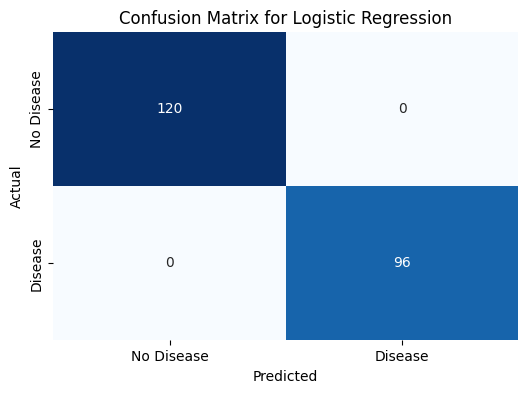

Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       120
     Disease       1.00      1.00      1.00        96

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

------------------------------------------------------------

📊 SVM Results:
Train Accuracy: 1.0000
Test Accuracy: 1.0000


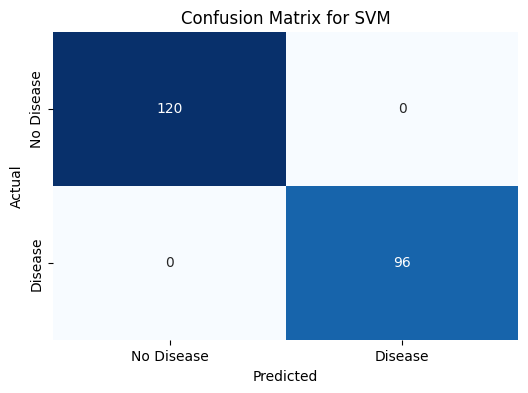

Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       120
     Disease       1.00      1.00      1.00        96

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

------------------------------------------------------------

📊 Decision Tree Results:
Train Accuracy: 1.0000
Test Accuracy: 1.0000


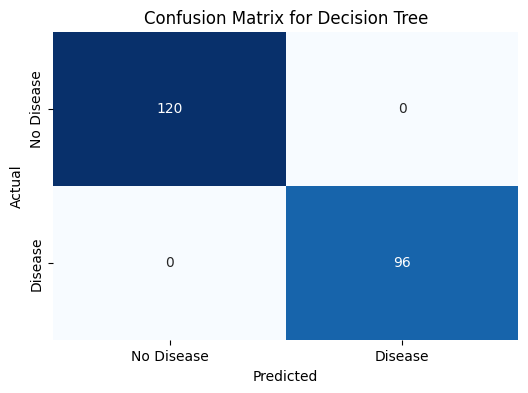

Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       120
     Disease       1.00      1.00      1.00        96

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

------------------------------------------------------------

📊 Random Forest Results:
Train Accuracy: 1.0000
Test Accuracy: 1.0000


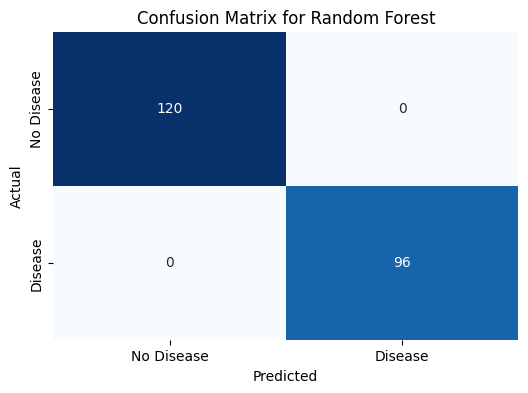

Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       120
     Disease       1.00      1.00      1.00        96

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

------------------------------------------------------------

📊 XGBoost Results:
Train Accuracy: 1.0000
Test Accuracy: 1.0000


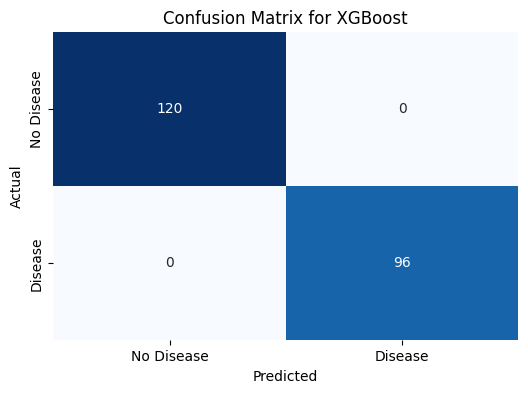

Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       120
     Disease       1.00      1.00      1.00        96

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

------------------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()
csv_filename = next(iter(uploaded))
df = pd.read_csv(csv_filename)


df['Age_bins'] = pd.cut(df['Age'], bins = [0, 40, 55, 70, 100], labels = [0,1,2,3] )
df['Serumcholesterol_bins'] = pd.cut(df['Serumcholesterol'], bins = [0, 125, 200, 1000], labels = [0,1,2])
df['Maximumheartachieved_Oldpeak'] = df['Maximumheartrateachieved'] * df['Oldpeak']
df['Chestpaintype_Restingbloodpressure'] = df['Chestpaintype'] * df['Restingbloodpressure']

#Prepare X and Y values
X = df.drop("Target",axis=1)
y = (df["Target"] > 0 ).astype(int)
X = pd.get_dummies(X, columns=['Age_bins', 'Serumcholesterol_bins'])

#Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only = True, include_bias = False)
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly)

#Standardazing
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_poly_scaled = pd.DataFrame(X_poly_scaled)

#Train Test SPlit
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42, stratify = y)

# ------------------------- Hyperparameter Grids -------------------------
param_grids = { #In my code, param_grids is a dictionary that defines hyperparameter grids for five models (Logistic Regression, SVM, Decision Tree, Random Forest, XGBoost).
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
        'probability': [True]
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1]
    }
}

# Models to train
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42), #random_state=42: Ensures reproducible results for model initialization
    "SVM": SVC(random_state=42), #random_state=42: Ensures reproducibility for kernel computations.
    "Decision Tree": DecisionTreeClassifier(random_state=42), #random_state=42: Fixes random splits in the tree for reproducibility.
    "Random Forest": RandomForestClassifier(random_state=42), #random_state=42: Ensures consistent tree sampling.
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) #(modern XGBoost requirement). (common for classification tasks).
}

# Grid Search + Training
best_models = {}
def grid_search_model(model, param_grid, name): #model: The model object (e.g., LogisticRegression() from base_models).
    print(f"\n🔍 Grid Search for {name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1) #5-fold cross-validation. 5split, 4,1-train,test ; repeats 5x, scoring='accuracy': Evaluates models based on accuracy
    grid_search.fit(X_train, y_train) #Runs the grid search, training and evaluating all parameter combinations.
    print(f"✅ Best Parameters: {grid_search.best_params_}")       #grid_search is an instance of the GridSearchCV class (from scikit-learn); . accesses its attributes.
    print(f"📈 Best CV Accuracy: {grid_search.best_score_:.4f}")   #best_params_ is a dictionary attribute containing the best hyperparameter values found during grid search.
    return grid_search.best_estimator_                              #Returns the trained model with the best hyperparameters.

for name in base_models:
    best_model = grid_search_model(base_models[name], param_grids[name], name) #Retrieves the model object, Retrieves the corresponding hyperparameter grid, name is key base_models
    best_models[name] = best_model #best_models contains five tuned models, each with the best hyperparameters from its grid search.

# ------------------------- Evaluation -------------------------
def evaluate_model(model, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\n📊 {model_name} Results:")
    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['No Disease', 'Disease']))
    print("-" * 60)

print("\n🧠 Model Evaluation Results")
for name, model in best_models.items():
    evaluate_model(model, name)

In [ ]:
import pickle

# Save all best models to .pkl files
for name, model in best_models.items():
    filename = name.lower().replace(" ", "_") + "_model.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

print("✅ All models saved as .pkl files!")
from google.colab import files
files.download('xgboost_model.pkl')
files.download('logistic_regression_model.pkl')
files.download('svm_model.pkl')
files.download('decision_tree_model.pkl')
files.download('random_forest_model.pkl')

✅ All models saved as .pkl files!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save preprocessor objects
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly.pkl')

print("✅ Preprocessor objects saved successfully!")
files.download('scaler.pkl')
files.download('poly.pkl')

✅ Preprocessor objects saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
expected_columns = X.columns
joblib.dump(expected_columns, 'expected_columns.pkl')
files.download('expected_columns.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>